In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
train_data = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)
training_set = train_data.flow_from_directory(
    "data", target_size=(224, 224), batch_size=32, class_mode="binary", subset="training"
)
validation_generator = train_data.flow_from_directory(
    "data", target_size=(224, 224), batch_size=32, class_mode="binary", subset="validation"
)

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding="same", activation="relu")(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

# Residual Block 1
shortcut = x
x = tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Add()([x, shortcut])
x = tf.keras.layers.Activation("relu")(x)

# Residual Block 2
shortcut = tf.keras.layers.Conv2D(128, kernel_size=1, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, kernel_size=3, padding="same", activation=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Add()([x, shortcut])
x = tf.keras.layers.Activation("relu")(x)

# Residual Block 3
shortcut = tf.keras.layers.Conv2D(256, kernel_size=1, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(256, kernel_size=3, strides=2, padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(256, kernel_size=3, padding="same", activation=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Add()([x, shortcut])
x = tf.keras.layers.Activation("relu")(x)

# Residual Block 4 
shortcut = tf.keras.layers.Conv2D(512, kernel_size=1, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(512, kernel_size=3, strides=2, padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same", activation=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Add()([x, shortcut])
x = tf.keras.layers.Activation("relu")(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(units=128, activation="relu")(x)
output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 56, 56,    │     36,928 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 56, 56,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 56, 56,    │          0 │ add_4[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 28, 28,    │     73,856 │ activation_4[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 28, 28,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 28, 28,    │      8,320 │ activation_4[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │ conv2d_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 28, 28,    │          0 │ add_5[0][0]     

 Total params: 4,976,641 (18.98 MB)

 Trainable params: 4,972,673 (18.97 MB)

 Non-trainable params: 3,968 (15.50 KB)

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 908ms/step - accuracy: 0.8864 - loss: 0.2644 - val_accuracy: 0.6000 - val_loss: 1.2347
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 834ms/step - accuracy: 0.8782 - loss: 0.2840 - val_accuracy: 0.5556 - val_loss: 1.8485
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 815ms/step - accuracy: 0.9156 - loss: 0.2500 - val_accuracy: 0.5333 - val_loss: 2.2242
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 828ms/step - accuracy: 0.8950 - loss: 0.2256 - val_accuracy: 0.5556 - val_loss: 2.7169
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 920ms/step - accuracy: 0.8997 - loss: 0.2399 - val_accuracy: 0.6444 - val_loss: 0.7235
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 887ms/step - accuracy: 0.9032 - loss: 0.2554 - val_accuracy: 0.5481 - val_loss: 1.1324
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 867ms/step - accuracy: 0.9293 - loss: 0.1903 - val_accuracy: 0.5111 - val_loss: 1.6621
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 882ms/step - accuracy: 0.9010 - loss: 0.2454 - val_accu

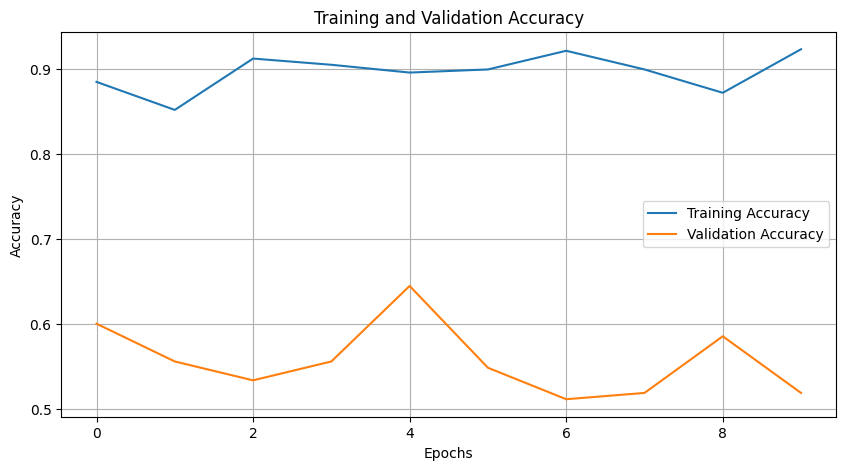

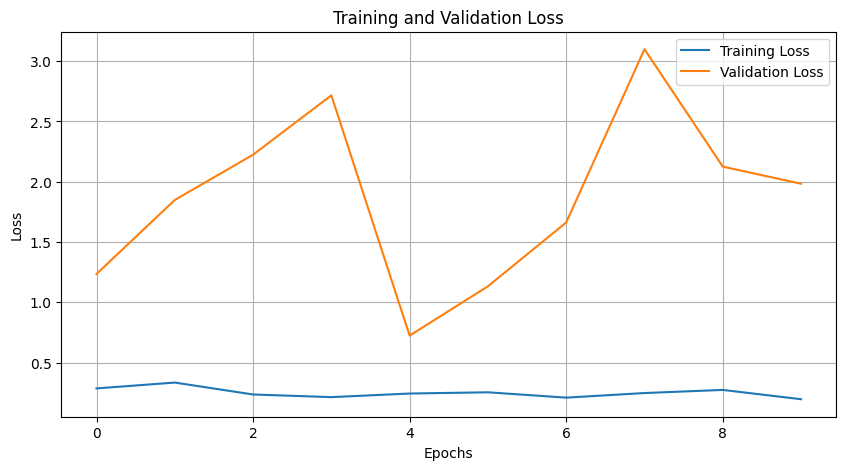

Epoch-wise Training and Validation Accuracy:
Epoch 1: Training Accuracy = 0.8846, Validation Accuracy = 0.6000
Epoch 2: Training Accuracy = 0.8516, Validation Accuracy = 0.5556
Epoch 3: Training Accuracy = 0.9121, Validation Accuracy = 0.5333
Epoch 4: Training Accuracy = 0.9048, Validation Accuracy = 0.5556
Epoch 5: Training Accuracy = 0.8956, Validation Accuracy = 0.6444
Epoch 6: Training Accuracy = 0.8993, Validation Accuracy = 0.5481
Epoch 7: Training Accuracy = 0.9212, Validation Accuracy = 0.5111
Epoch 8: Training Accuracy = 0.8993, Validation Accuracy = 0.5185
Epoch 9: Training Accuracy = 0.8718, Validation Accuracy = 0.5852
Epoch 10: Training Accuracy = 0.9231, Validation Accuracy = 0.5185


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',  
    patience=5,         
    restore_best_weights=True  
)

history = model.fit(
    training_set,
    validation_data=validation_generator,
    epochs=40,  
    callbacks=[early_stop]  
)

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Epoch-wise Training and Validation Accuracy:")
for epoch, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy']), 1):
    print(f"Epoch {epoch}: Training Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

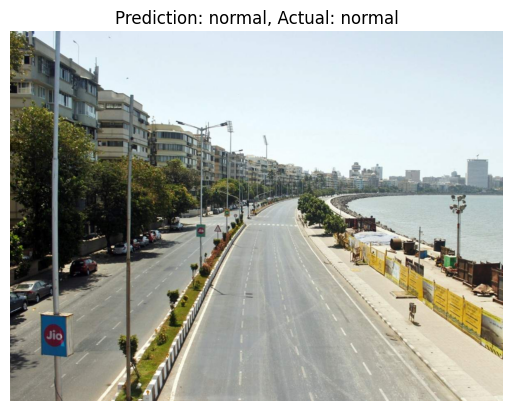

Image: clean_1.jpg, Predicted Class: normal, Actual Class: normal


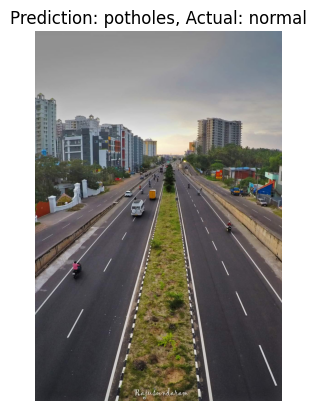

Image: clean_10.jpg, Predicted Class: potholes, Actual Class: normal


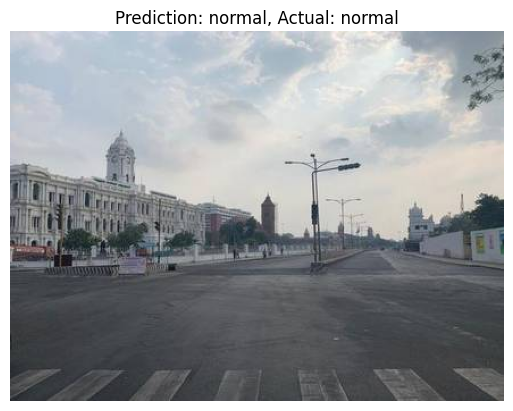

Image: clean_100.jpg, Predicted Class: normal, Actual Class: normal


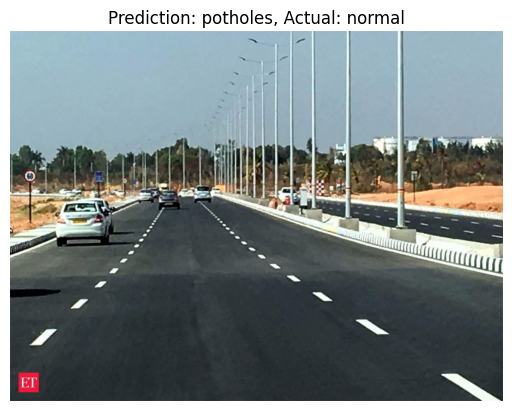

Image: clean_101.jpg, Predicted Class: potholes, Actual Class: normal


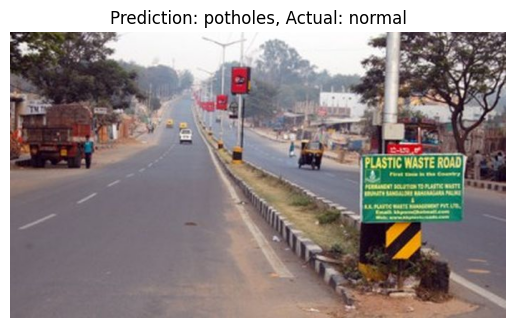

Image: clean_102.jpg, Predicted Class: potholes, Actual Class: normal

Displaying 5 images for category: potholes


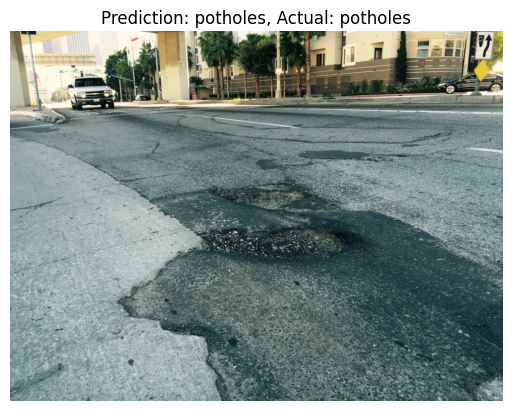

Image: 1.jpg, Predicted Class: potholes, Actual Class: potholes


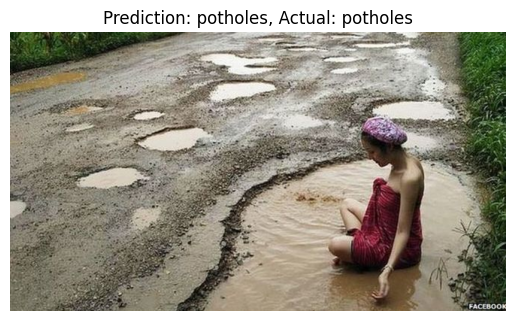

Image: 10.jpg, Predicted Class: potholes, Actual Class: potholes


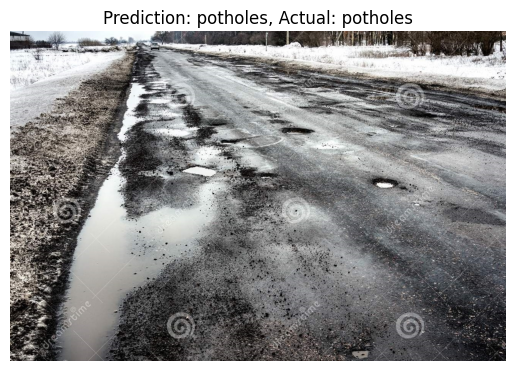

Image: 100.jpg, Predicted Class: potholes, Actual Class: potholes


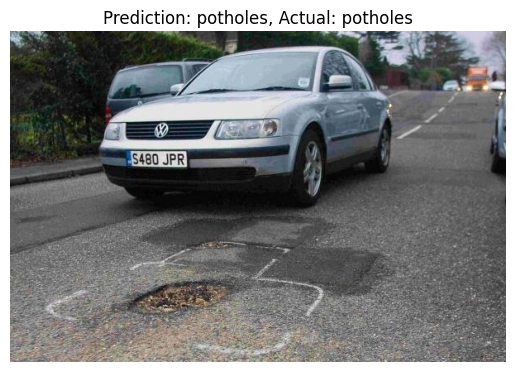

Image: 101.jpg, Predicted Class: potholes, Actual Class: potholes


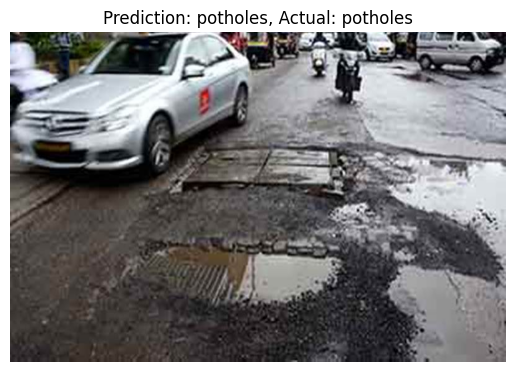

Image: 102.jpg, Predicted Class: potholes, Actual Class: potholes


In [10]:
test_folder = "test"
categories = ["normal", "potholes"]  
images_to_display_per_category = 5 
correct_predictions = 0
total_predictions = 0
images_to_display = {category: [] for category in categories}

for category in categories:
    category_folder = os.path.join(test_folder, category)
    if not os.path.exists(category_folder):
        print(f"Folder {category_folder} not found.")
        continue

    for filename in os.listdir(category_folder):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(category_folder, filename)

            test_image = image.load_img(img_path, target_size=(224, 224))
            test_image_array = image.img_to_array(test_image)
            test_image_array = np.expand_dims(test_image_array, axis=0)
            test_image_array = test_image_array / 255.0  

            result = model.predict(test_image_array)
            prediction = "potholes" if result[0] >= 0.5 else "normal"
            is_correct = prediction == category
            if is_correct:
                correct_predictions += 1
            total_predictions += 1
            if len(images_to_display[category]) < images_to_display_per_category:
                images_to_display[category].append((img_path, prediction))
accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
print(f"\nOverall Accuracy: {accuracy:.2f}%")
for category, images in images_to_display.items():
    print(f"\nDisplaying {images_to_display_per_category} images for category: {category}")
    for img_path, prediction in images:
        plt.imshow(image.load_img(img_path))
        plt.title(f"Prediction: {prediction}, Actual: {category}")
        plt.axis("off")
        plt.show()
        print(f"Image: {os.path.basename(img_path)}, Predicted Class: {prediction}, Actual Class: {category}")

